# **Advanced Methods of Machine Learning**


#  Carlos Álvarez

### **Git-hub: https://github.com/Alvarez527**
### **Linkedin: www.linkedin.com/in/cralvarez-ai**


#### Professor: Pepe Cantoral Ph.D.

## **Deep Learning - Fully Connected Deep Neural Networks**
#### Activity 1b: Implementing a Fully Connected Network for Kaggle ASL Dataset

Created On: Jan 15, 2025 | Last Updated: Jan 26, 2025

# **Instructions of the Activity**



#### Activity 1b: Implementing a Fully Connected Network for Kaggle ASL Dataset

- Objective

The aim of this part of the activity is to apply your understanding of Fully Connected Networks by implementing a multilayer network for the [Kaggle ASL (American Sign Language) dataset](https://www.kaggle.com/datasets/grassknoted/asl-alphabet). While you have been provided with a complete solution for a Fully Connected Network using Numpy for the MNIST dataset, you are encouraged to try to come up with the solution.

- Instructions

    This activity requires submission in teams of 3 or 4 members. Submissions from smaller or larger teams will not be accepted unless prior approval has been granted (only due to exceptional circumstances). While teamwork is encouraged, each member is expected to contribute individually to the assignment. The final submission should feature the best arguments and solutions from each team member. Only one person per team needs to submit the completed work, but it is imperative that the names of all team members are listed in a Markdown cell at the very beginning of the notebook (either the first or second cell). Failure to include all team member names will result in the grade being awarded solely to the individual who submitted the assignment, with zero points given to other team members (no exceptions will be made to this rule).

    Load and Preprocess Data: You are provided a starter code to load the data. Be sure to understand the code.

    Review MNIST Notebook (Optional): Before diving into this activity, you have the option to revisit the MNIST example to refresh your understanding of how to build a Fully Connected Network using Numpy.

    Start Fresh: Although you can refer to the MNIST solution at any point, try to implement the network for the ASL dataset on your own. This will reinforce your learning and understanding of the architecture and mathematics involved.

    Implement Forward and Backward Pass: Write the code to perform the forward and backward passes, keeping in mind the specific challenges and characteristics of the ASL dataset.
    
     Design the Network: Create the architecture of the Fully Connected Network tailored for the ASL dataset. Choose the number of hidden layers, neurons, and hyperparameters judiciously.

    Train the Model: Execute the training loop, ensuring to track performance metrics such as loss and accuracy.

    Analyze and Document: Use Markdown cells to document in detail the choices you made in terms of architecture and hyperparameters, you may use figures, equations, etc to aid in your explanations. Include any metrics that help justify these choices and discuss the model's performance.  

- Evaluation Criteria

    - Code Readability and Comments
    - Appropriateness of chosen architecture and hyperparameters for the ASL dataset
    - Performance of the model on the ASL dataset (at least 70% acc)
    - Quality of Markdown documentation

- Submission

Submit this Jupyter Notebook in canvas with your complete solution, ensuring your code is well-commented and includes Markdown cells that explain your design choices, results, and any challenges you encountered.

In the following section the necessary libraries are imported.

%load_ext autoreload`: This command loads the autoreload extension, which allows for automatic reloading of modules before executing code. This is useful during development to see changes without restarting the kernel.

`%autoreload 2`: This command sets the autoreload mode to 2, which means all modules will be reloaded automatically before executing any code. This ensures that any changes made to the modules are reflected immediately.

`%matplotlib inline`: This command enables the inline backend for Matplotlib, allowing plots to be displayed directly within the Jupyter Notebook, rather than in a separate window.

# **Environment Setup**

Import the necessary libraries. NumPy for array handling, string for working with text strings, Pandas for data analysis, Matplotlib for visualization, OpenCV for image processing, and os for interacting with the operating system. %load_ext autoreload and %autoreload 2 are useful for automatically reloading modules in Jupyter Notebook/IPython.%matplotlib inline allows plots to be displayed directly in the notebook.

In [1]:
import numpy as np
import string
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
import os

%load_ext autoreload
%autoreload 2
#################################
%matplotlib inline


Imports the os module for interacting with the operating system and the drive module from google.colab to mount Google Drive in a Colab environment.

In [2]:
import os
from google.colab import drive

This code sets file paths in Google Drive within a Colab environment. It defines the base path to Google Drive, appends a specific directory for a course, and finally, points to a folder containing data files.

In [3]:
DRIVE_PATH = '/content/drive'
DIR_PATH = DRIVE_PATH + '/My Drive/Colab Notebooks/Advanced Machine Learning Methods/A1b Kaggle'
DATA_PATH = DIR_PATH + '/asl_data'

In [4]:
drive.mount(DRIVE_PATH)
os.chdir(DIR_PATH)

Mounted at /content/drive


Load the training and validation datasets from CSV files.

In [5]:
train_df = pd.read_csv(os.path.join(DATA_PATH, 'sign_mnist_train.csv'))
valid_df = pd.read_csv(os.path.join(DATA_PATH, 'sign_mnist_valid.csv'))

In [6]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,12,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


# **Import Images**


Let's prepare the data for our model. We'll separate the image labels (the sign language letter) from the pixel data (the image itself). The code extracts the labels into y_train and y_val, then removes the labels from the original dataframes. Finally, the pixel data is converted to NumPy arrays (x_train, x_val) for efficient processing. This prepares our features and labels for the next steps.

In [7]:
y_train = np.array(train_df['label'])
y_val = np.array(valid_df['label'])
del train_df['label']
del valid_df['label']
x_train = train_df.values.astype(np.float32)
x_val = valid_df.values.astype(np.float32)

In [8]:
x_val.shape

(7172, 784)

We need to define a function that splits a validation set into a validation and test set (this is important because we'll use the validation set to tune our model's performance during training, and the test set to evaluate its final performance on unseen data). It accepts input data (x) and labels (y), with optional parameters for the percentage (pct) to use for testing and whether to shuffle the data (shuffle). It shuffles the data if specified, then splits it into validation and test sets based on the given percentage and returns the split sets.

In [9]:
def split_val_test(x, y, pct=0.5, shuffle=True):
  '''
  Splits the input data into validation and test sets.

  Args:
      x (numpy.ndarray): Input data to be split.
      y (numpy.ndarray): Corresponding labels.
      pct (float, optional): Percentage of the data to use for validation. Defaults to 0.5.
      shuffle (bool, optional): Whether to shuffle the data before splitting. Defaults to True.

  Returns:
      tuple: A tuple containing the validation and test sets (x_val, y_val, x_test, y_test).
  '''
  if shuffle:
      idx = np.arange(len(y))
      np.random.shuffle(idx)
      x = x[idx]
      y = y[idx]

  split_idx = int(len(y) * pct)

  x_val, x_test = x[:split_idx], x[split_idx:]
  y_val, y_test = y[:split_idx], y[split_idx:]

  return x_val, y_val, x_test, y_test  # Return the split sets

In [10]:
## The validation data is split, and 2 data groups are received (x_val, x_test & y_val, y_test)
x_val, y_val, x_test, y_test = split_val_test(x_val, y_val)

In [11]:
x_val.shape

(3586, 784)

In [12]:
x_test.shape

(3586, 784)

The following code prepares the alphabet labels for our sign language dataset. The Sign Language MNIST dataset doesn't include the letters 'j' and 'z' because they require motion to be signed. Therefore, we need to create a list of the alphabet without these two letters.

In [13]:
alphabet=list(string.ascii_lowercase) # List of all alphabet letters in lowercase (26 letters)
alphabet.remove('j')
alphabet.remove('z')
print(len(alphabet)) # 24 letters left

24


# **Normalize**


The range of features is standardized or normalized to ensure they are on similar scales.

**Why is this necessary?**
- To ensure that all variables are, in principle, equally competitive in their relevance to the model's construction.
- It prevents excessive oscillations during error minimization methods like gradient descent, helping them converge more effectively.
- Algorithms that rely on distance calculations are also impacted by the magnitude of the features.

In this section, the Z-score or Gaussian Transformation is used to standardize the pixel values of the images. This transformation adjusts the pixel intensities to have a mean of 0 and a standard deviation of 1.

By standardizing the pixel values, the neural network benefits from improved numerical stability during training, allowing the optimization algorithms, such as gradient descent, to converge more efficiently. This preprocessing step ensures that the pixel values are on a similar scale, which helps the network learn patterns more effectively and speeds up the training process.

In [14]:
def normalize(x_mean, x_std, x_data):
    '''
      Normalizes the data using the mean and standard deviation from x.

      Args:
        x_mean (float): Mean of the data.
        x_std (float): Standard deviation of the data.
        x_data (numpy.ndarray): Data to be normalized.

      Returns:
        numpy.ndarray: Normalized data.
    '''
    return (x_data - x_mean) / x_std

In [15]:
# Current mean, std and min values from x_train
x_train.mean(), x_train.std(), x_train.min()

(159.29083, 48.76953, 0.0)

Normalize the pixel data in our training, validation, and test sets. Normalization is a common preprocessing step in machine learning that helps improve model performance. First, we calculate the mean (x_mean) and standard deviation (x_std) of the pixel values in the training set. Then, we use these values to normalize the training, validation, and test sets using a normalize function. This ensures that all datasets are transformed using the same statistics, derived from the training data.

In [16]:
# Create mean and std variables to pass to our normalise function
x_mean = x_train.mean()
x_std = x_train.std()

# Normalize data in our datasets
x_train = normalize(x_mean, x_std, x_train)
x_val = normalize(x_mean, x_std, x_val)
x_test = normalize(x_mean, x_std, x_test)

In [17]:
# New mean, std and min values from x_train
x_train.mean(), x_train.std(), x_train.min()

(3.6268384e-06, 0.99999946, -3.2661958)

# **Plotting Samples**

This function displays an image in grayscale. It creates a figure, shows the image with a grayscale colormap, hides the axis for a cleaner appearance, and then renders the plot that corresponds to the desired letter.

In [18]:
# Declare a function to print the images
def plot_letter(image):
    '''
    Plots a single image from the ASL Dataset.

    Args:
        image (numpy.ndarray): The image to be plotted.
    '''
    if image.ndim == 1:  # Check if the image is flattened
      image_reshaped = image.reshape(28, 28)
    elif image.shape == (28, 28): # Check if it's already the correct shape
      image_reshaped = image
    else:
      raise ValueError("Image must be a flattened array (784 elements) or a 28x28 array.")

    plt.figure(figsize=(2, 2))
    plt.imshow(image_reshaped, cmap=plt.get_cmap('gray')) # No need for squeeze() now
    plt.axis('off')
    plt.show()

This code snippet picks a random image from the test set, tells what letter that image represents according to the label, and then shows the image itself.

The sampled image represents the letter: m


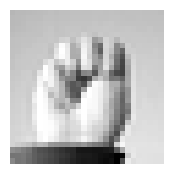

In [19]:
rnd_idx = np.random.randint(len(y_test))
print(f'The sampled image represents the letter: {alphabet[y_test[rnd_idx]]}')
plot_letter(x_test[rnd_idx])

# **Equations for our model**


$$z^1 = W^1 X + b^1$$

$$a^1 = ReLU(z^1) $$

$$z^2 = W^2 a^1 + b^2$$

$$\hat{y} = \frac{e^{z^{2_k}}}{\sum_j{e^{z_j}}}$$


$$ \mathcal{L}(\hat{y}^{i}, y^{i}) =  - y^{i}  \ln(\hat{y}^{i}) = -\ln(\hat{y}^i)$$


$$ \mathcal{J}(w, b) =  \frac{1}{num\_samples} \sum_{i=1}^{num\_samples}-\ln(\hat{y}^{i})$$

# **Additional Functions**

### **Mini batches**

This function creates **mini-batches** from the dataset. It takes the mini-batch size (mb_size), input features (x), labels (y), and an optional shuffle parameter. It shuffles the data if specified, checks that the number of samples in x and y match, and returns a generator that yields mini-batches of x and y. Using mini-batches is a standard practice in training machine learning models, especially with large datasets, as it helps improve efficiency and stability of the training process.

In [20]:
# This will allow us to train the model later sending only a section of the data at a time,
# which will make the training more efficient than sending the whole data at once
def create_minibatches(size, x, y, shuffle = True):
    '''
    Creates minibatches of data of a certaing size.

    Args:
        size (int): Size of each minibatch.
        x (numpy.ndarray): Input data.
        y (numpy.ndarray): Labels.
        shuffle (bool, optional): Whether to shuffle the data before creating minibatches. Defaults to True.

    Returns:
        generator: A generator that yields minibatches of data.
    '''
    # Ensure that the number of samples in x and y are the same
    assert x.shape[0] == y.shape[0], 'Error in sample quantity'

    # Get the total number of samples
    total_data = x.shape[0]

    # Shuffle the data if specified
    if shuffle:
        idxs = np.arange(total_data)
        np.random.shuffle(idxs)
        x = x[idxs]
        y = y[idxs]

    # Create and return a generator for mini-batches
    return ((x[i:i+size], y[i:i+size]) for i in range(0, total_data, size))

The next class inherits from numpy array, but allows us to add attributes later to the parameters, such as .grad for the gradient of the parameter.

In [21]:
class np_tensor(np.ndarray): pass

# **Our class Linear, ReLU and Sequential**

### **Class Linear**

NNs are composed of a chain of connected neurons usually organized in ***n*** layers.  These layers are fully connected with the next and previous layers, and no connections exist between neurons of the same layer *(Scabini & Bruno, 2023, p. 1)*.

One of the basic principles of conventional neural networks is to cascade non-linear aggregation functions that are supposed to mimic the functioning of natural neurons, hence their name “artificial neurons”. the conventional neuron is the succession of a weighted addition performing a balance and a non-linearity performing a choice *(Strauss et al., 2025, pp. 1-2)*.

This section describes a basic implementation of a neuron in a fully connected layer, represented by the Linear class. This class simulates the behavior of a neuron by performing both the forward and backward passes, essential for training a neural network.

During initialization, the weights of the neuron (W) are set using Kaiming He initialization. This approach ensures better convergence during training by scaling the weights appropriately based on the input size. The biases (b) are initialized to zero, providing a starting point for adjustments during training.

The forward pass is implemented in the *__call__* method, where the input data (X) is transformed using the formula:
$$
Z = W \cdot X + b
$$

Here, the weights and biases adjust the input data to produce the neuron's output, which is later passed to the activation function.

The backward method handles the gradient computations required during backpropagation. It calculates the gradient of the loss with respect to the inputs (X), weights (W), and biases (b). This step is crucial for updating the parameters of the neuron in subsequent training iterations, allowing the network to minimize the error. This method applies the following formulas:

**Gradient of the Input (X)**
   $$
   X.\text{grad} = W^\top \cdot Z.\text{grad}
   $$

**Gradient of the Weights (W):**
   $$
   W.\text{grad} = Z.\text{grad} \cdot X^\top
   $$

**Gradient of the Biases (b):**
   $$
   b.\text{grad} = \sum Z.\text{grad}
   $$


The next code defines a **Linear class**, which represents a fully connected layer in a neural network. It includes the forward and backward pass logic necessary for training the layer using gradient descent.

In [22]:
class Linear():
    def __init__(self, input_size, output_size):
        '''
        Inits parameters using Kaiming He

        Args:
            input_size (int): Number of input neurons.
            output_size (int): Number of output neurons.
        '''
        self.W = (np.random.randn(output_size, input_size) / np.sqrt(input_size/2)).view(np_tensor)
        self.b = (np.zeros((output_size, 1))).view(np_tensor)
    def __call__(self, X):
        '''
        Performs the forward pass of the linear layer.
        It uses the dunder function __call__ to make the forward pass using the instance of this class directly.

        Args:
            X (numpy.ndarray): Input data matrix.

        Returns:
            numpy.ndarray: Output of the linear layer.
        '''
        Z = self.W @ X + self.b # Represents formula Z = Wx + b
        return Z
    def backward(self, X, Z):
        '''
        Performs the backward pass of the linear layer.

        Args:
            X (numpy.ndarray): Input data matrix.
            Z (numpy.ndarray): Output of the linear layer.
        '''
        X.grad = self.W.T @ Z.grad # We need to transposed W so dimensions match
        self.W.grad = Z.grad @ X.T
        self.b.grad = np.sum(Z.grad, axis = 1, keepdims=True) # Z is a matrix of dimensions: num neurons * num items in minibatch, here we sum each column, then with "axis=1" we put it in one dimension so it matches dimension in "b"


### **Class ReLU**

ReLU (Rectified Linear Unit) is an activation function applied to the neurons, except for those in the output layer. This function has been found to outperform other activation functions, such as the sigmoid function, in deep neural networks *(Agyeman et al., 2024, p. 286)*.

ReLU activation functions have demonstrated superior performance due to their ability to mitigate the vanishing gradient problem and accelerate convergence. The latter by introducing non-linearity and enhancing the model's capacity to capture complex relationships within the data *(Tipu et al., 2023, p. 7)*.

In the forward pass, the ReLU function is applied to the input data 𝑍 (which is the output of the linear transformation from the previous layer). The ReLU activation function replaces all negative values with zero, while leaving positive values unchanged. This is mathematically expressed as:
$$
\text{ReLU}(Z) = \max(0, Z)
$$

This transformation allows the network to introduce sparsity in the activations, which can help improve the model's generalization ability by reducing overfitting.

During the backward pass, ReLU is differentiable except at zero. In this step, the gradients are propagated backward through the network. The gradient of the ReLU function is 1 for all positive values and 0 for all negative values (since the function is flat at negative values). Therefore, when performing the backpropagation, the gradient is preserved for positive values of Z, and the gradient is set to zero for non-positive values. The backward pass can be mathematically described as:
$$
\frac{\partial L}{\partial Z} =
\begin{cases}
1, & \text{if } Z > 0 \\
0, & \text{if } Z \leq 0
\end{cases}
$$

The next code defines a **class ReLU** implementing the Rectified Linear Unit activation function, a common choice in neural networks.

__call__ (self, Z) applies the ReLU activation function, replacing the negative values of Z with 0 and leaving the positive values unchanged.

**backward** (self, Z, A) calculates the gradient of the ReLU activation funcitona with respect to Z during the backpropagation step. It sets the gradients to 0 for the negative values of Z and copies the gradients for the positive values of Z.

In [23]:
class ReLU():
    def __call__(self, Z):
        '''
        Performs the forward pass of the ReLU activation function.

        Args:
            Z (numpy.ndarray): Input data (Output of the Linear function).

        Returns:
            numpy.ndarray: Output of the ReLU activation function.
        '''
        return np.maximum(0, Z)
    def backward(self, Z, A):
        '''
        Performs the backward pass of the ReLU activation function.

        Args:
            Z (numpy.ndarray): Input data (Output of the Linear function).
            A (numpy.ndarray): Output of the ReLU activation function.
        '''
        Z.grad = A.grad.copy()
        Z.grad[Z <= 0] = 0

### **Class Sequential**

The use of artificial neuronal network or ANNs is also growing, as they are a powerful, useful and effective tool for the prediction of different variables of interest. More specifically, the backpropagation predictive model has proved to be a predictive tool, showing adequate model fit and network learning capability *(Pagan-Garbín et al., 2024)*.

This class represents a basic neural network model, designed to stack layers (such as linear and activation functions) and manage their interactions during training and inference.

__Initialization__: The model is initialized with a list of layers, which can include linear transformations and activation functions like ReLU. Outputs from each layer are stored in a dictionary for use during forward and backward passes.

__Forward Pass__: The forward pass computes the outputs of each layer sequentially. For the first layer, the computation involves a linear transformation followed by the ReLU activation:
$$z^1 = W^1 X + b^1$$

The activation for the first layer is then computed using the ReLU function (Where 𝑎1 is the output of the activation, which is passed to the next layer):
$$a^1 = ReLU(z^1) $$

For the second layer, a similar linear transformation is applied to the output of the previous activation:
$$z^2 = W^2 a^1 + b^2$$

__Backward Pass__: The backward pass computes gradients for each layer starting from the output layer, propagating errors back to earlier layers. For each layer, the gradients of the loss with respect to the weights *W* and biases *b* are calculated using the chain rule.

__Parameter Updates__: During updates, weights *W* and biases *b* are adjusted using the gradients and the learning rate 𝑎. Formulas:
$$
W^l = W^l - \alpha \cdot \frac{\partial W^l}{\partial L}, \quad b^l = b^l - \alpha \cdot \frac{\partial b^l}{\partial L}
$$


__Prediction__: The model predicts the class label for input X by:
$$
\text{prediction} = \arg\max(\text{output})
$$


The next code stores a list of layers that could be a **Relu or Linear** object and will iterate on this list in order to execute the forward pass or the backward propagation, storing the values of the corresponding activations of each layer.

In [24]:
class Sequential_layers():
    def __init__(self, layers):
        '''
        Inits a sequential model.

        Args:
            layers (list): List of layers (Objects that can be Linear of ReLU).
        '''
        self.layers = layers  # It stores these layers in a list called self.layers
        self.x = None         # self.x (used to store intermediate outputs during the forward pass)
        self.outputs = {}     # self.outputs (a dictionary to store the outputs of each layer for use in the backward pass)

    def __call__(self, X):
        '''
        Performs the forward pass of the sequential model.

        Args:
            X (numpy.ndarray): Input data matrix. This will be the images in this activity, ie. the input of the whole neural network

        Returns:
            numpy.ndarray: Output of the sequential model.
        '''
        self.x = X  # Initialize x with the input data, representing the first layer (input layer)
        self.outputs['l0'] = self.x # Layer 0 will be the inputs (images) themselves
        for i, layer in enumerate(self.layers, 1):
            self.x = layer(self.x)  # Layer contains an object of type: "neural network layer", so, here we'll call the function __call__ from the Linear or ReLU and save the output in x (override the variable)
            self.outputs['l'+str(i)] = self.x # The same output from before is saved permanently here
        return self.x # Note: In the last layer, this will be the scores

    def backward(self):
        '''
        Performs the backward pass of the sequential model. This step computes the gradients for each layer
        by propagating the error backwards through the network.

        The gradients are used to update the parameters of each layer during training.
        '''
        for i in reversed(range(len(self.layers))):
            self.layers[i].backward(self.outputs['l'+str(i)], self.outputs['l'+str(i+1)]) # We use input and output from each layer, saved in outputs (outputs[i] and outputs[i+1] respectively)

    def update(self, learning_rate = 1e-3):
        '''
        Updates the parameters (weights and biases) of the sequential model using gradient descent.

         Args:
        learning_rate (float, optional): The rate at which the model updates its parameters.
                                          A smaller value results in slower updates. Defaults to 1e-3.
        '''
        for layer in self.layers:
            if isinstance(layer, ReLU): continue # If it's a ReLU layer (which has no parameters),we don't do any updates
            # Update the weights (W) and biases (b) of each layer using the computed gradients
            # The update rule is: parameter = parameter - learning_rate * gradient
            layer.W = layer.W - learning_rate * layer.W.grad # Update weights using the gradient of weights
            layer.b = layer.b - learning_rate * layer.b.grad # Update biases using the gradient of biases

    def predict(self, X):
        '''
        Predicts the class of a given input by passing it through the trained model.

        Args:
        X (numpy.ndarray): Input data matrix. Typically, this will be a set of test samples or new data points.

        Returns:
        numpy.ndarray: Predicted class. This is the class with the highest probability from the model's output.
        '''
        return np.argmax(self.__call__(X)) #Pass the input X through the model to get the final scores, then return the index of the highest score (predicted class)

### **Cost Function**

NN models are usually trained using first order optimization methods that rely on calculation of the gradient of objective function according to model parameters. These optimization algorithms form the basis for a machine to learn through its experience. Algorithm performance is judged by the fact that in optimization: “how close is the expected output to the desired output?” This is achieved by the loss function of the network *(Barati et al., 2025, pp. 5-6)*.

In many ways to boost the performance of CNNs, optimizing the classification loss is an effective method since the loss provides gradients to update weights of CNNs and guides the convergence procedure directly *(Zhang et al., 2025, p. 2)*.

One of the most fundamental model used in the modern machine learning society as a base of the loss function, which classifies the samples into different classes is Softmax *(Ye et al, 2024, p. 1)*.

In the context of multi-class classification, the softmax activation function is commonly employed to transform the raw output of a neural network into a probability distribution. This ensures that the model assigns a probability to each class.

The cross-entropy loss, on the other hand, quantifies how well the predicted probabilities align with the true class labels. By combining these two steps into a single function, the process becomes computationally efficient and seamlessly integrated.

Softmax with Cross-Entropy Loss function performs two main operations:
  - Softmax Transformation: For each input in a batch, the function calculates the exponential scores of the raw outputs. These scores are normalized by dividing them by the sum of all exponential scores across the classes. This yields a vector of probabilities (probs) for each input. Formula:
  $$
  \text{softmax}(x_i) = \frac{\exp(x_i)}{\sum_{j} \exp(x_j)}
  $$

  - Cross-Entropy Loss Calculation: Using the true class labels, the function extracts the predicted probabilities for the correct classes (ŷ) and computes the logarithm of these probabilities. The negative log-probabilities are then averaged across the batch to yield the loss value. This loss reflects the confidence of the model in its predictions. Formula:
  $$
  \text{loss} = -\frac{1}{N} \sum_{i=1}^{N} \log(p(ŷ{_i}))
  $$


In the next code we use **Softmax** for the output of the neural network, but we'll need the cost function, so we put the two together in one function.

In [25]:
def softmaxXEntropy(x, y):
    '''
    Computes the softmax activation function and the cross-entropy loss.

    Args:
        x (numpy.ndarray): Input data.
        y (numpy.ndarray): Labels.

    Returns:
        tuple: A tuple containing the predictions (scores) and the cross-entropy loss value.
    '''
    batch_size = x.shape[1] # Get the number of samples in the batch
    exp_scores = np.exp(x)  # Apply the exponential function to each score (logit)
    probs = exp_scores / exp_scores.sum(axis = 0) # Normalize the scores to get probabilities (softmax)
    preds = probs.copy() # Copy the probabilities as predictions
    # Cost computation using cross-entropy loss
    #Using advanced indexing, we extract the probabilities corresponding to the true labels:
    y_hat = probs[y.squeeze(), np.arange(batch_size)] # Get the predicted probabilities for the true classes
    cost = np.sum(-np.log(y_hat)) / batch_size  # Calculate the cross-entropy loss
     # Gradients calculation (for backpropagation)
    probs[y.squeeze(), np.arange(batch_size)] -= 1 # Subtract 1 from the probability of the true class
    x.grad = probs.copy() # Set the gradient of the input as the modified probabilities

    return preds, cost # Return predictions and the loss value

### **Training Loop**

This function calculates the **accuracy** of a model's predictions. It iterates over mini-batches of input data (x) and labels (y), gets the model's predictions, counts the correct predictions, and calculates the total number of predictions. Finally, it returns the accuracy as the ratio of correct predictions to total predictions.

In [26]:
def accuracy(x, y, mb_size):
    '''
    Computes the accuracy of the model.

    Args:
        x (numpy.ndarray): Input data.
        y (numpy.ndarray): Labels.
        mb_size (int): Size of each minibatch.

    Returns:
        float: Accuracy of the model.
    '''
    correct = 0
    total = 0
    for i, (x, y) in enumerate(create_minibatches(mb_size, x, y)):
        pred = model(x.T.view(np_tensor))
        correct += np.sum(np.argmax(pred, axis=0) == y.squeeze())
        total += pred.shape[1]
    return correct/total

This function **train** a model for a specified number of epochs. It takes the model, number of epochs, mini-batch size (mb_size), and learning rate as arguments. For each mini-batch, it computes the model's scores, calculates the cost using softmax cross-entropy, performs backpropagation, and updates the model's parameters. After each epoch, it prints the cost and accuracy on the validation set.

In [27]:
#The default mb_size is 128 and the learning rate es 1e-3
def train(model, epochs, mb_size=128, learning_rate=1e-3, patience=5, plot=True):
    '''
    Trains the model with early stopping and plots the metrics.

    Args:
        model (Sequential_layers): Model to be trained.
        epochs (int): Number of epochs to train the model.
        mb_size (int, optional): Size of each minibatch. Defaults to 128.
        learning_rate (float, optional): Value for the learning rate. Defaults to 1e-3.
        patience (int, optional): Number of epochs to wait for improvement before stopping. Defaults to 5.
    '''
    best_val_accuracy = 0
    patience_counter = 0

    # Lists to store metrics
    train_costs = []
    val_accuracies = []

    for epoch in range(epochs):
        epoch_cost = 0  # Track cost for the epoch
        # Training loop
        for i, (x, y) in enumerate(create_minibatches(mb_size, x_train, y_train)):
            scores = model(x.T.view(np_tensor))  # Forward pass
            _, cost = softmaxXEntropy(scores, y)  # Compute cost
            model.backward()  # Backpropagation
            model.update(learning_rate)  # Update weights
            epoch_cost += cost  # Accumulate cost for the epoch

        train_costs.append(epoch_cost / len(x_train))  # Average cost per sample
        val_accuracy = accuracy(x_val, y_val, mb_size)
        val_accuracies.append(val_accuracy)

        print(f'Epoch {epoch+1}/{epochs}, Cost: {epoch_cost:.6f}, Validation Accuracy: {val_accuracy:.6f}')

        # Early stopping logic
        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            patience_counter = 0  # Reset patience counter
        else:
            patience_counter += 1
            print(f'No improvement for {patience_counter} epochs.')

        if patience_counter >= patience:
            print('Early stopping triggered.')
            break

    # Plotting metrics
    if plot:
      plot_metrics(train_costs, val_accuracies)#Plots cost function and validation accuracy

We added the function plot_metric to quickly compare model architectures based on the plotting of the cost and validation curves. This function is automaticall called from training if the argument "plot" is called.

In [28]:
def plot_metrics(train_costs, val_accuracies):
    '''
    Plots the training cost and validation accuracy lists received from the train function.

    Args:
        train_costs (list): List of training costs per epoch.
        val_accuracies (list): List of validation accuracies per epoch.
    '''
    epochs = range(1, len(train_costs) + 1)

    # Plot training cost
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_costs, label='Training Cost', marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.title('Training Cost vs. Epochs')
    plt.legend()

    # Plot validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, val_accuracies, label='Validation Accuracy', marker='o', color='green')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Validation Accuracy vs. Epochs')
    plt.legend()

    plt.tight_layout()
    plt.show()

### **Create the model and train it**

This code defines a sequential model with multiple layers. The model consists of definition of linear layers with ReLU activation functions in between. It also sets the mini-batch size, the learning rate, and the number of epochs for training.

**Model Architecture and Hyperparameter Justification**

The model follows a fully connected neural network structure with the following layers:
  - Input Layer: Linear layer with 784 input features and 300 output features.
  - Hidden Layers: Three fully connected layers, each with 300 neurons, followed by ReLU activations.
  - Output Layer: Linear layer with 24 output features.

The three hidden layers with ReLU activation ensure the model has sufficient capacity to learn complex, non-linear relationships in the data. The choice of 300 neurons per layer strikes a balance between representational power and overfitting risk.

Hyperparameter Selection:
  - Batch Size (mb_size = 512): A batch size of 512 was selected to take full advantage of GPU acceleration while ensuring consistent and stable gradient updates during backpropagation.
  - Learning Rate (learning_rate = 1e-3): A moderate learning rate was selected to ensure convergence without overshooting the optimal solution.
  - Epochs (epochs = 200): Although the model was set to train for up to 200 epochs, early stopping with patience=50 prevented unnecessary training once validation performance plateaued.

In [29]:
model = Sequential_layers([Linear(784, 300), ReLU(), Linear(300, 300), ReLU(), Linear(300, 300), ReLU(), Linear(300, 24)])
mb_size = 512
learning_rate = 1e-3
epochs = 200

Epoch 1/200, Cost: 83.365024, Validation Accuracy: 0.766592
Epoch 2/200, Cost: 2.807121, Validation Accuracy: 0.796431
Epoch 3/200, Cost: 0.409600, Validation Accuracy: 0.808701
Epoch 4/200, Cost: 0.218340, Validation Accuracy: 0.812047
Epoch 5/200, Cost: 0.145939, Validation Accuracy: 0.811768
No improvement for 1 epochs.
Epoch 6/200, Cost: 0.108211, Validation Accuracy: 0.813999
Epoch 7/200, Cost: 0.085583, Validation Accuracy: 0.811489
No improvement for 1 epochs.
Epoch 8/200, Cost: 0.070260, Validation Accuracy: 0.811489
No improvement for 2 epochs.
Epoch 9/200, Cost: 0.059229, Validation Accuracy: 0.812326
No improvement for 3 epochs.
Epoch 10/200, Cost: 0.051035, Validation Accuracy: 0.812605
No improvement for 4 epochs.
Epoch 11/200, Cost: 0.044721, Validation Accuracy: 0.812883
No improvement for 5 epochs.
Epoch 12/200, Cost: 0.039736, Validation Accuracy: 0.811768
No improvement for 6 epochs.
Epoch 13/200, Cost: 0.035793, Validation Accuracy: 0.813720
No improvement for 7 epoc

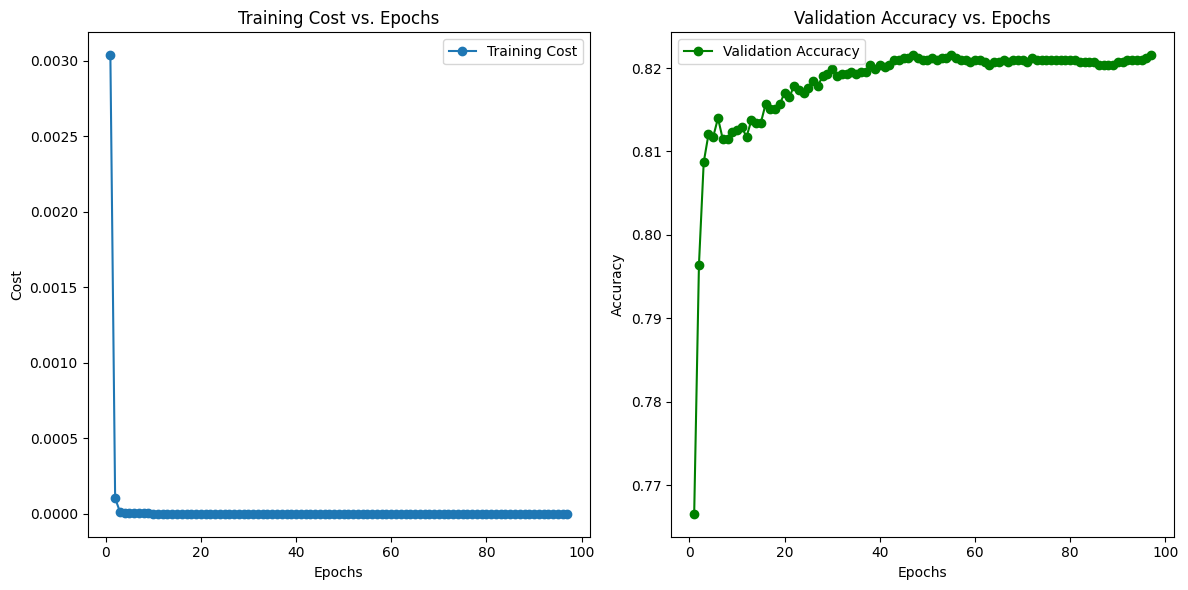

In [30]:
train(model, epochs, mb_size, learning_rate, patience=50, plot=True)

Conclusion of the model training process:
  - The training process shows consistent improvement in cost and validation accuracy during the initial epochs.
  - The validation accuracy plateaued around 80.5%, with minimal fluctuations during the final epochs, suggesting convergence.
  - The cost decreased logarithmically, reflecting effective learning during the initial training stages.
  - Validation accuracy consistently improved up to epoch 72, after which improvements became negligible.


### **Test the model on Random Data from the test set**

In [31]:
print(accuracy(x_test, y_test, mb_size))

0.8165086447295036


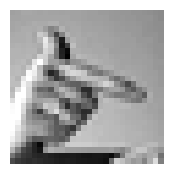

Predicted value is: t when real value is: t


In [38]:
idx = np.random.randint(len(y_test))
plot_letter(x_test[idx].reshape(28,28))
pred = model.predict(x_test[idx].reshape(-1, 1))
print(f'Predicted value is: {alphabet[pred]} when real value is: {alphabet[y_test[idx]]}')

### **References**

Agyeman, B., Liu, J., & Shah, S. (2024). ReLU surrogates in mixed-integer MPC for irrigation scheduling. *Chemical Engineering Research and Design*, *211*, 285-298. https://doi.org/10.1016/j.cherd.2024.10.005.

Barati, B., Erfaninejad, M., Khanbabaei, H. (2025). Evaluation of effect of optimizers and loss functions on prediction accuracy of brain tumor type using a Light neural network. *Biomedical Signal Processing and Control*, *103*, 1-17. https://doi.org/10.1016/j.bspc.2024.107409.

Scabini, L., & Bruno, O. (2023). Structure and performance of fully connected neural networks: Emerging complex network properties. *Physica A: Statistical Mechanics and its Applications*, *615*, 1-17. https://doi.org/10.1016/j.physa.2023.128585.

Pagan-Garbín, I., Méndez, I., & Martínez-Ramon, J. P. (2024). Exploration of stress, burnout and technostress levels in teachers. Prediction of their resilience levels using an artificial neuronal network (ANN). *Teaching and Teacher Education*, *148*, 1-11. https://doi.org/10.1016/j.tate.2024.104717.

Strauss, O., Rico, A., Pasquet, J., & Pibre, L. (2025). Combining thresholded real values for designing an artificial neuron in a neural network. *Fuzzy Sets and Systems*, *449*, 1-15. https://doi.org/10.1016/j.fss.2024.109191.

Tipu, R. K., Batra, V., Suman, Pandya, K.S., & Panchal, V.R. (2023). Shear capacity prediction for FRCM-strengthened RC beams using Hybrid ReLU-Activated BPNN model. *Structures*, *58*, 1-16. https://doi.org/10.1016/j.istruc.2023.105432.

Ye, X., Zhao, J., Qian, J., & Li, Y. (2024). SoftmaxU: Open softmax to be aware of unknowns. *Engineering Applications of Artificial Intelligence*, *133*, 1-11. https://doi.org/10.1016/j.engappai.2024.108594.

Zhang, Q., Zhang, X., Yang, J., Sun, M., & Cao, T. (2025). Introducing Euclidean Distance Optimization into Softmax Loss under Neural Collapse. *Pattern Recognition*, 1-37. https://doi.org/10.1016/j.patcog.2025.111400.